## K13 機会学習 第6回課題
### JINS MEME から得られるデータを元に、Polar H10の測定値から算出されるストレス値を予測

(利用シーン)
- ユーザはJINS MEMEをかけている
- Polar H10等の心拍センサは身につけていない
- 機械学習を行うことで、JINS　MEMEで得られるデータを基に、ストレス値を算出する  

使用するデータ：stressData.csv

(データの理解)  
与えられたデータから、ストレス値についての回帰分析を行う前に、データがどのような特性があり、相関関係があるのか確認する。  
[含まれているデータの中身]
Stress eyeMoveUp eyeMoveDown eyeMoveLeft eyeMoveRight blinkSpeed blinkStrength walking roll pitch yaw accX accY accZ

※1分間の平均値を利用  

eyeMoveUp     視線が上に動いたかどうを示す整数値  
eyeMoveDown   視線が下に動いたかどうを示す整数値  
eyeMoveLeft   視線が左に動いたかどうを示す整数値  
eyeMoveRight  視線が右に動いたかどうを示す整数値  
blinkSpeed    まばたきのスピード  
blinkStrength まばたきの強さ  
walking       かかとを地面についたどうか  

roll  姿勢を表す角度のうちロール要素を示す度  
pitch 姿勢を表す角度のうちピッチ要素を示す度  
yaw   姿勢を表す角度のうちヨー要素を示す度  
accX  加速度のX軸の値  
accY  加速度のY軸の値  
accZ  加速度のZ軸の値  

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("data/StressData.csv")

In [4]:
# データの表示(0列目にStressがある。これを予測する)
df

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ
0,1.5829,0.010833,0.043333,0.035833,0.035000,3.991667,2.757500,0.003333,-14.057250,67.466825,276.476133,3.562917,12.925885,-7.695000
1,1.9203,0.025833,0.049167,0.087500,0.083333,4.625000,3.173333,0.025000,-5.160117,22.682433,276.713125,1.198854,3.677865,-14.497188
2,0.5001,0.008333,0.014167,0.013333,0.013333,4.741667,3.296667,0.000000,12.649808,14.136133,63.246117,-3.840521,1.478385,-15.356875
3,1.3952,0.046667,0.057500,0.052500,0.058333,5.091667,4.399167,0.038333,-7.968200,29.484583,284.256283,1.898281,4.995260,-13.646406
4,2.2462,0.015833,0.041667,0.050000,0.068333,5.516667,3.453333,0.000833,-1.588308,9.208992,132.826758,0.100365,0.054635,-15.621458
5,1.2826,0.025812,0.029975,0.048293,0.045795,3.572023,2.537052,0.006661,-8.829167,13.182373,268.350683,2.045119,1.024875,-14.966018
6,1.4425,0.010000,0.012500,0.025833,0.020833,3.175000,2.365000,0.000000,-17.653758,53.037758,333.365742,4.616510,10.271302,-10.201719
7,0.7531,0.012500,0.010000,0.020833,0.015000,2.325000,1.221667,0.000000,-24.428842,56.649100,344.583708,6.330781,10.532708,-9.726354
8,2.2325,0.025021,0.040033,0.062552,0.071726,5.663053,3.491243,0.000000,-0.611668,7.138891,132.581651,-0.171758,-0.478055,-15.736291
9,0.9670,0.016667,0.028333,0.040000,0.034167,1.833333,1.166667,0.000000,-10.647092,26.638450,224.388508,2.361979,5.025990,-14.835052


In [5]:
print("データの要素数：",len(df))
print("データの形：",df.shape)

データの要素数： 1418
データの形： (1418, 14)


In [6]:
# 各データ型を表示
df.dtypes

Stress           float64
eyeMoveUp        float64
eyeMoveDown      float64
eyeMoveLeft      float64
eyeMoveRight     float64
blinkSpeed       float64
blinkStrength    float64
walking          float64
roll             float64
pitch            float64
yaw              float64
accX             float64
accY             float64
accZ             float64
dtype: object

In [7]:
df.head(3)

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ
0,1.5829,0.010833,0.043333,0.035833,0.035000,3.991667,2.757500,0.003333,-14.057250,67.466825,276.476133,3.562917,12.925885,-7.695000
1,1.9203,0.025833,0.049167,0.087500,0.083333,4.625000,3.173333,0.025000,-5.160117,22.682433,276.713125,1.198854,3.677865,-14.497188
2,0.5001,0.008333,0.014167,0.013333,0.013333,4.741667,3.296667,0.000000,12.649808,14.136133,63.246117,-3.840521,1.478385,-15.356875


In [9]:
np.sqrt(df.loc[0,"accX"]**2+df.loc[0,"accY"]**2+df.loc[0,"accZ"]**2)

15.459169255395162

In [84]:
# 加速度センサーを合成ベクトル(resultant vector)に変換し、追加
df.loc[:, "resultantVector"] = np.sqrt(df.loc[:,"accX"]**2 + df.loc[:,"accY"]**2+df.loc[:,"accZ"]**2)
df.loc[:, "eyeMoveTotal"] = df.loc[:,"eyeMoveUp"]+df.loc[:,"eyeMoveDown"]+df.loc[:,"eyeMoveLeft"]+df.loc[:,"eyeMoveRight"]

In [85]:
df.head(10)

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ,resultantVector,eyeMoveTotal
0,1.5829,0.010833,0.043333,0.035833,0.035000,3.991667,2.757500,0.003333,-14.057250,67.466825,276.476133,3.562917,12.925885,-7.695000,15.459169,0.125000
1,1.9203,0.025833,0.049167,0.087500,0.083333,4.625000,3.173333,0.025000,-5.160117,22.682433,276.713125,1.198854,3.677865,-14.497188,15.004412,0.245833
2,0.5001,0.008333,0.014167,0.013333,0.013333,4.741667,3.296667,0.000000,12.649808,14.136133,63.246117,-3.840521,1.478385,-15.356875,15.898705,0.049167
3,1.3952,0.046667,0.057500,0.052500,0.058333,5.091667,4.399167,0.038333,-7.968200,29.484583,284.256283,1.898281,4.995260,-13.646406,14.655392,0.215000
4,2.2462,0.015833,0.041667,0.050000,0.068333,5.516667,3.453333,0.000833,-1.588308,9.208992,132.826758,0.100365,0.054635,-15.621458,15.621876,0.175833
5,1.2826,0.025812,0.029975,0.048293,0.045795,3.572023,2.537052,0.006661,-8.829167,13.182373,268.350683,2.045119,1.024875,-14.966018,15.139834,0.149875
6,1.4425,0.010000,0.012500,0.025833,0.020833,3.175000,2.365000,0.000000,-17.653758,53.037758,333.365742,4.616510,10.271302,-10.201719,15.194962,0.069167
7,0.7531,0.012500,0.010000,0.020833,0.015000,2.325000,1.221667,0.000000,-24.428842,56.649100,344.583708,6.330781,10.532708,-9.726354,15.672227,0.058333
8,2.2325,0.025021,0.040033,0.062552,0.071726,5.663053,3.491243,0.000000,-0.611668,7.138891,132.581651,-0.171758,-0.478055,-15.736291,15.744487,0.199333
9,0.9670,0.016667,0.028333,0.040000,0.034167,1.833333,1.166667,0.000000,-10.647092,26.638450,224.388508,2.361979,5.025990,-14.835052,15.840400,0.119167


In [86]:
df2=df.sort_values(by="blinkSpeed")

In [87]:
df2.head()

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ,resultantVector,eyeMoveTotal
1100,2.5148,0.002500,0.006667,0.009167,0.007500,0.475000,0.168333,0.000833,-0.829108,-1.441542,308.670600,-0.287708,-2.760052,-15.651042,15.895149,0.025833
1295,2.2298,0.015833,0.019167,0.039167,0.026667,0.558333,0.285000,0.000000,-7.450600,7.966900,285.012233,1.646302,-0.132083,-15.859792,15.945556,0.100833
458,3.5090,0.026667,0.041667,0.047500,0.058333,0.625000,0.395000,0.000000,-4.434067,18.819742,128.302542,1.167344,2.960208,-15.094948,15.426697,0.174167
589,1.6173,0.007500,0.017500,0.030833,0.015833,0.633333,0.489167,0.000000,-5.699858,11.265708,233.287667,1.237812,0.714531,-15.779115,15.843711,0.071667
526,3.4885,0.011667,0.014167,0.009167,0.010833,0.633333,0.389167,0.000000,-8.832975,46.256617,248.628908,2.001094,9.525885,-12.364115,15.735889,0.045833


In [88]:
df.describe()

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ,resultantVector,eyeMoveTotal
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,2.638792,0.016364,0.025187,0.032272,0.031791,2.811692,1.841522,0.002784,-5.738991,16.811046,172.404427,1.237580,2.150061,-14.755158,15.599900,0.105614
std,0.846678,0.009683,0.016518,0.020258,0.021459,1.449037,1.033731,0.010941,7.765578,14.878837,90.085326,2.124249,3.646666,1.440293,0.619249,0.062409
min,0.500100,0.000000,0.000000,0.000000,0.000000,0.475000,0.168333,0.000000,-41.517917,-44.191192,8.604183,-7.446458,-9.657135,-16.048947,4.028049,0.000000
25%,1.969750,0.009174,0.013344,0.019167,0.017500,1.737587,1.074151,0.000000,-9.278939,5.144727,101.251871,0.357148,-0.800039,-15.704453,15.479626,0.062565
50%,2.616950,0.015000,0.020833,0.027083,0.026667,2.475000,1.604002,0.000000,-6.152560,13.619896,160.631896,1.391518,1.352917,-15.181221,15.809209,0.090833
75%,3.221725,0.021685,0.032857,0.040825,0.040833,3.597917,2.373750,0.000000,-2.540131,27.072754,253.722588,2.243394,4.916601,-14.411273,15.911195,0.130625
max,5.808900,0.057500,0.115207,0.156667,0.222222,14.722222,8.030000,0.103333,26.634217,80.300742,354.848267,10.161771,14.162187,-3.640729,16.117218,0.405833


In [89]:
# カラム間の相関関数を確認。
df.corr()

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ,resultantVector,eyeMoveTotal
Stress,1.000000,0.242776,0.295296,0.281635,0.316484,0.176586,0.147969,0.169881,-0.010229,0.041362,0.023041,0.017111,0.035725,0.129777,-0.161536,0.316072
eyeMoveUp,0.242776,1.000000,0.794882,0.678283,0.649795,0.398719,0.351285,0.407347,-0.015832,0.092379,-0.022796,0.013567,0.082459,0.173098,-0.281577,0.809154
eyeMoveDown,0.295296,0.794882,1.000000,0.795308,0.762686,0.490954,0.436192,0.534220,-0.021221,0.075056,0.020129,0.020693,0.067270,0.166727,-0.324413,0.908426
eyeMoveLeft,0.281635,0.678283,0.795308,1.000000,0.913106,0.494415,0.451182,0.582330,-0.066266,0.074642,0.058566,0.065426,0.062897,0.111055,-0.266426,0.954323
eyeMoveRight,0.316484,0.649795,0.762686,0.913106,1.000000,0.552639,0.480311,0.565792,-0.046125,0.067410,0.003199,0.047955,0.051913,0.114775,-0.264498,0.942941
blinkSpeed,0.176586,0.398719,0.490954,0.494415,0.552639,1.000000,0.943240,0.461614,0.171357,0.044060,-0.024021,-0.181241,0.029371,0.229363,-0.286773,0.542327
blinkStrength,0.147969,0.351285,0.436192,0.451182,0.480311,0.943240,1.000000,0.403490,0.198071,0.013213,0.006235,-0.207903,0.001731,0.195783,-0.254679,0.481569
walking,0.169881,0.407347,0.534220,0.582330,0.565792,0.461614,0.403490,1.000000,-0.023030,0.146369,0.020234,0.032398,0.139819,0.149368,-0.269205,0.588177
roll,-0.010229,-0.015832,-0.021221,-0.066266,-0.046125,0.171357,0.198071,-0.023030,1.000000,-0.291942,-0.086613,-0.996761,-0.282416,-0.262881,0.019951,-0.045444
pitch,0.041362,0.092379,0.075056,0.074642,0.067410,0.044060,0.013213,0.146369,-0.291942,1.000000,0.002192,0.296154,0.982966,0.719591,-0.125022,0.081607


In [16]:
df_corr['Stress']

Stress             1.000000
eyeMoveUp          0.242776
eyeMoveDown        0.295296
eyeMoveLeft        0.281635
eyeMoveRight       0.316484
blinkSpeed         0.176586
blinkStrength      0.147969
walking            0.169881
roll              -0.010229
pitch              0.041362
yaw                0.023041
accX               0.017111
accY               0.035725
accZ               0.129777
resultantVector   -0.161536
Name: Stress, dtype: float64

In [17]:
df_sort=df.sort_values(by='blinkStrength', ascending=True)

In [19]:
df_sort.head()

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ,resultantVector
1100,2.5148,0.002500,0.006667,0.009167,0.007500,0.475000,0.168333,0.000833,-0.829108,-1.441542,308.670600,-0.287708,-2.760052,-15.651042,15.895149
1295,2.2298,0.015833,0.019167,0.039167,0.026667,0.558333,0.285000,0.000000,-7.450600,7.966900,285.012233,1.646302,-0.132083,-15.859792,15.945556
1125,3.8519,0.014167,0.015000,0.026667,0.020000,0.658333,0.300833,0.000000,-5.820383,1.063092,153.158883,1.275625,-2.053385,-15.672135,15.857473
1219,2.3747,0.017500,0.021667,0.024167,0.022500,0.791667,0.353333,0.000000,-3.997242,23.482742,113.824142,0.825990,4.102604,-15.274740,15.837654
726,2.5142,0.006667,0.021667,0.028333,0.020000,0.708333,0.377500,0.000000,-5.527642,8.014133,272.067050,0.762188,0.007708,-16.029323,16.047435


In [20]:
%matplotlib inline
from pandas.plotting import scatter_matrix

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


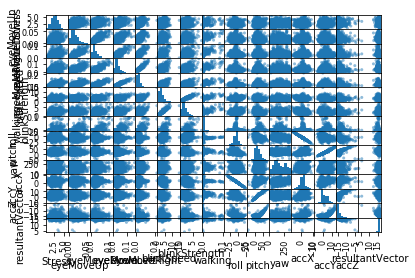

In [21]:
_ = scatter_matrix(df)

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


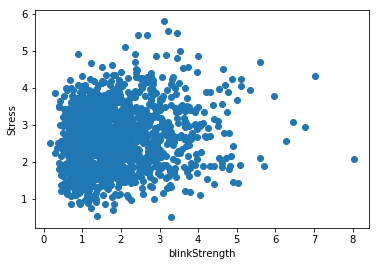

In [77]:
fig, ax = plt.subplots()

x = df_sort['blinkStrength']
y = df_sort['Stress']

ax.set_xlabel('blinkStrength')
ax.set_ylabel('Stress')
ax.scatter(x,y)

plt.show()

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


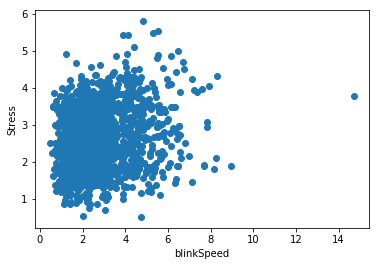

In [78]:
fig, ax = plt.subplots()


x = df_sort['blinkSpeed']
y = df_sort['Stress']

ax.set_xlabel('blinkSpeed')
ax.set_ylabel('Stress')
ax.scatter(x1,y)

plt.show()

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


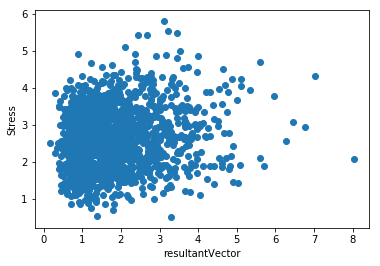

In [25]:
fig_v, ax_v = plt.subplots()

x = df_sort['resultantVector']
y = df_sort['Stress']

ax_v.set_xlabel('resultantVector')
ax_v.set_ylabel('Stress')
ax_v.scatter(x0,y)

plt.show()

In [26]:
df_stress=df['Stress']

In [81]:
df_stress.head()

0    1.5829
1    1.9203
2    0.5001
3    1.3952
4    2.2462
Name: Stress, dtype: float64

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


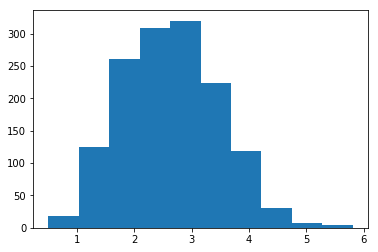

In [29]:
fig_hist, ax_hist = plt.subplots() 
n,bins, patches = ax_hist.hist(df['Stress'])
plt.show()

histメソッドは返り血として度数分布表に使用できるデータを返す  
n:各ビン(棒)の度数(要素数)が格納  
bins:ビンの境界の値  
patches:ビンを描画するための情報  

In [33]:
print("n:", n)
print("bins:", bins)
print("patches:", patches)

n: [ 19. 125. 261. 308. 320. 223. 118.  31.   8.   5.]
bins: [0.5001  1.03098 1.56186 2.09274 2.62362 3.1545  3.68538 4.21626 4.74714
 5.27802 5.8089 ]
patches: <a list of 10 Patch objects>


In [34]:
for i, num in enumerate(n):
    print('{:.2f} - {:.2f}: {}'.format(bins[i], bins[i+1], num))

0.50 - 1.03: 19.0
1.03 - 1.56: 125.0
1.56 - 2.09: 261.0
2.09 - 2.62: 308.0
2.62 - 3.15: 320.0
3.15 - 3.69: 223.0
3.69 - 4.22: 118.0
4.22 - 4.75: 31.0
4.75 - 5.28: 8.0
5.28 - 5.81: 5.0


/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


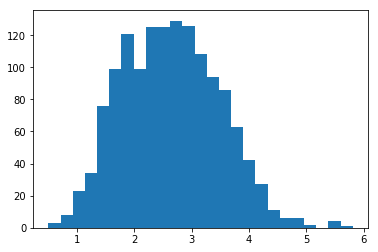

In [37]:
fig_hist2, ax_hist2 = plt.subplots()
ax_hist2.hist(df['Stress'], bins=25)
plt.show()

In [41]:
df['Stress'].mean()

2.6387922425952093

In [42]:
df['Stress'].std()

0.8466778625665402

In [43]:
df['Stress'].median()

2.61695

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


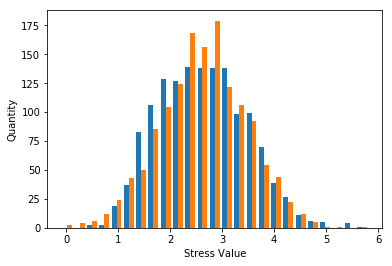

In [64]:
fig_hist2, ax_hist2 = plt.subplots()

# 正規分布のデータを作成(平均：Stressデータの平均、標準偏差：Stressデータの標準偏差、サイズ：Stress配列を同じ数字)
np.random.seed(123)
mu = df['Stress'].mean()
std = df['Stress'].std()
x_gen = np.random.normal(
    loc   = mu,      # 平均
    scale = std,      # 標準偏差
    size  = 1417,    # 出力配列のサイズ(タプルも可)
)

# Stressデータと、生成した正規分布データをプロット
ax_hist2.hist((df['Stress'], x_gen), bins=25)
ax_hist2.set_xlabel('Stress Value')
ax_hist2.set_ylabel('Quantity')

plt.show()

In [79]:
# 目の動き
df3=df.sort_values(by='eyeMoveTotal')
df3.head()

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ,resultantVector,eyeMoveTotal
213,1.4646,0.000000,0.000000,0.000000,0.000000,1.050000,0.715000,0.000000,-5.850858,3.360575,8.604183,1.498438,-0.665052,-15.846719,15.931293,0.000000
903,1.4853,0.000000,0.001667,0.001667,0.003333,1.450000,0.896667,0.001667,-4.411775,11.572500,354.848267,0.890260,0.979635,-15.893594,15.948623,0.006667
1274,3.4640,0.000834,0.003336,0.002502,0.001668,2.201835,1.562135,0.000000,-4.541401,0.769358,145.591843,1.024500,-1.884748,-15.740357,15.885865,0.008340
794,2.5846,0.004167,0.002500,0.003333,0.000833,1.391667,0.975833,0.000000,-2.865675,20.604883,10.218400,0.419479,3.514531,-15.610781,16.007010,0.010833
283,1.5743,0.000834,0.000834,0.006672,0.002502,1.042535,0.669725,0.000000,-3.500259,4.032560,20.488857,0.851022,-0.497811,-15.898249,15.928790,0.010842


/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


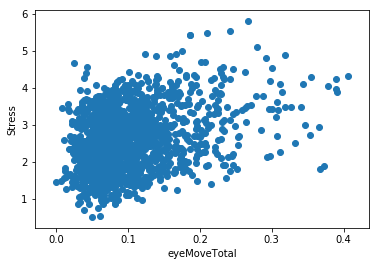

In [80]:
fig_eyeMove, ax_eyeMove = plt.subplots()

x_eye = df3['eyeMoveTotal']
y_eye = df3['Stress']

ax_eyeMove.set_xlabel('eyeMoveTotal')
ax_eyeMove.set_ylabel('Stress')
ax_eyeMove.scatter(x_eye,y_eye)

plt.show()

In [90]:
from mpl_toolkits.mplot3d import Axes3D